# Predicting the sales of items from different stores for a russian company
## Tushar Pasricha - April 2020

In [1]:
# Importing required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt


# settings
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#  Fetching all the files in pandas dataframes
shops = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")
sales = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
test = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
item = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
item_catg = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
submission = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv")

# **Data Exploration**

## **sales_train data** 

In [3]:
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [4]:
print('training data has {} columns and {} rows'.format(sales.shape[1],sales.shape[0]))
print('test data has {} columns and {} rows'.format(test.shape[1],test.shape[0]))

training data has 6 columns and 2935849 rows
test data has 3 columns and 214200 rows


In [5]:
#formatting the date column correctly
import datetime
sales.date=sales.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [6]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


item_cnt_day column has negative values as well, I will be considering them as the items returned to the stores on that day

In [7]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


## Checking the items which are present in test set but not in training set

In [8]:
test_only = test[~test['item_id'].isin(sales['item_id'].unique())]['item_id'].unique()
print('test only items:', len(test_only))

test only items: 363


In [9]:
# dropping shops&items not in test data
shops_in_test = test.shop_id.unique()
items_in_test = test.item_id.unique()
sales = sales[sales.shop_id.isin(shops_in_test)]
sales = sales[sales.item_id.isin(items_in_test)]

print('sales:', sales.shape)

sales: (1224439, 6)


In [10]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
10,2013-01-03,0,25,2574,399.0,2.0
11,2013-01-05,0,25,2574,399.0,1.0
12,2013-01-07,0,25,2574,399.0,1.0
13,2013-01-08,0,25,2574,399.0,2.0


# Checking for Outliers

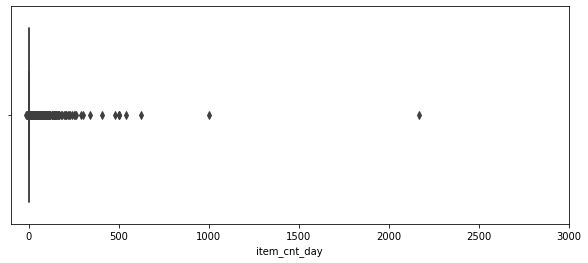

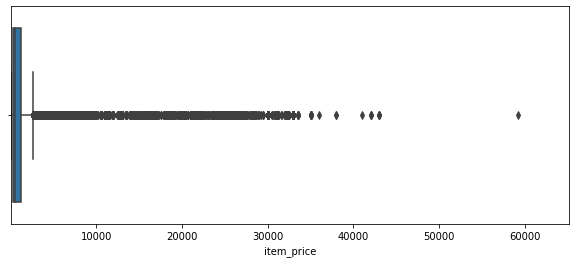

In [11]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=sales.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(sales.item_price.min(), sales.item_price.max()*1.1)
sns.boxplot(x=sales.item_price)

In the first Boxplot 
    1. There are 2 outliers

In the second Boxplot
    1. There is no outlier

## Removing the outliers

In [12]:
sales = sales[sales.item_cnt_day<1000]

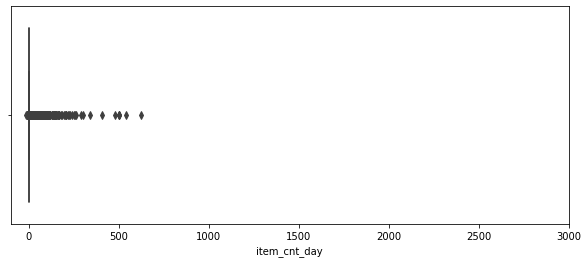

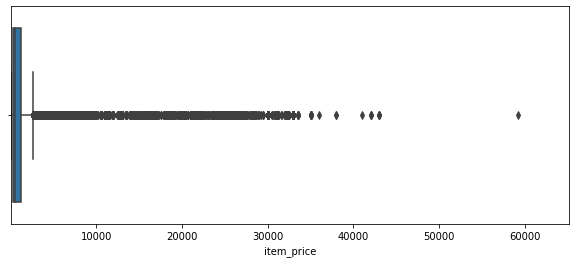

In [13]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=sales.item_cnt_day)


plt.figure(figsize=(10,4))
plt.xlim(sales.item_price.min(), sales.item_price.max()*1.1)
sns.boxplot(x=sales.item_price)

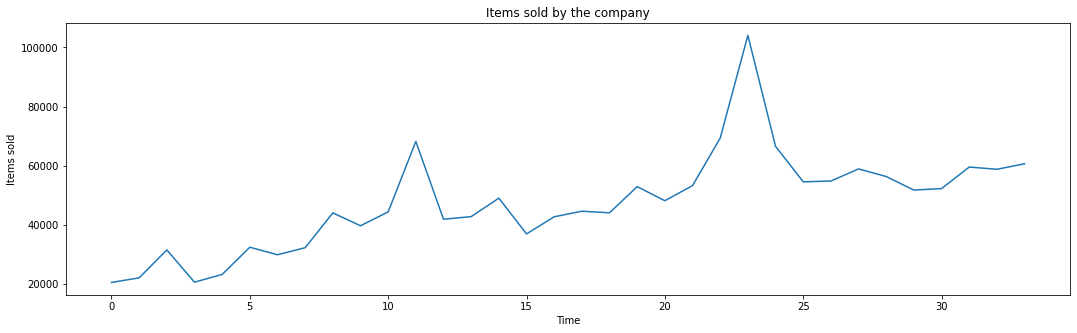

In [14]:
## Checking the number of items sold per month
month_wise_items_sold = sales.groupby('date_block_num').agg({'item_cnt_day' : sum},inplace = True , reset_index = True)
plt.figure(figsize=(18,5))
plt.title('Items sold by the company')
plt.xlabel('Time')
plt.ylabel('Items sold')
plt.plot(month_wise_items_sold);

## As we can see there is a sudden peak after the 10th month and 22nd month, that probably signifies the increase in sales during holidays period around christmas in Russia

In [15]:
calculating_revenue = sales
calculating_revenue['revenue'] = calculating_revenue['item_price'] * calculating_revenue['item_cnt_day']
calculating_revenue.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
0,2013-01-02,0,59,22154,999.0,1.0,999.0
10,2013-01-03,0,25,2574,399.0,2.0,798.0
11,2013-01-05,0,25,2574,399.0,1.0,399.0
12,2013-01-07,0,25,2574,399.0,1.0,399.0
13,2013-01-08,0,25,2574,399.0,2.0,798.0


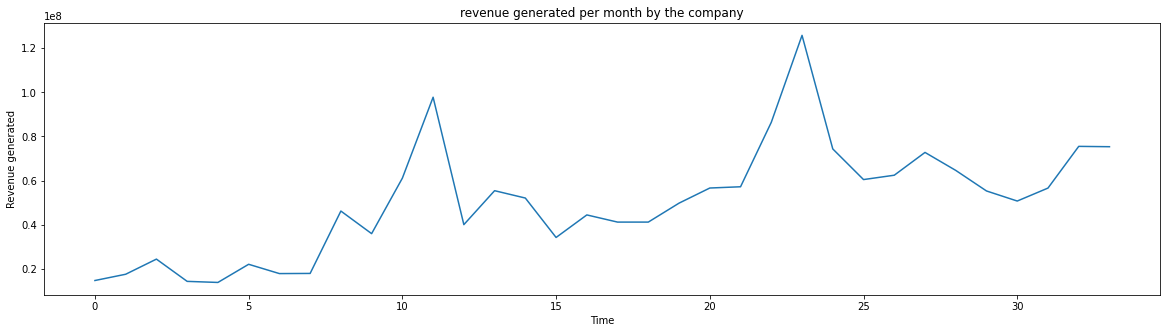

In [16]:
## Checking the revenue generated by the company per month
month_wise_revenue = calculating_revenue.groupby('date_block_num').agg({'revenue' : sum})
plt.figure(figsize=(20,5))
plt.title('revenue generated per month by the company')
plt.xlabel('Time')
plt.ylabel('Revenue generated')
plt.plot(month_wise_revenue);

## As we can see in the above graph the revenue generated is higher around 24th month in the series i.e December 2014 has the highest sales of all time

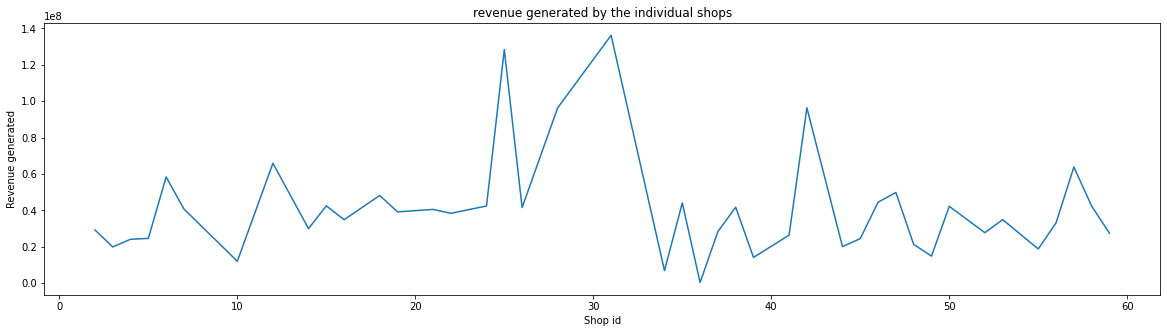

In [17]:
shop_wise_revenue = calculating_revenue.groupby('shop_id').agg({'revenue' : sum})
plt.figure(figsize=(20,5))
plt.title('revenue generated by the individual shops')
plt.xlabel('Shop id')
plt.ylabel('Revenue generated')
plt.plot(shop_wise_revenue);

### Shop id 31 has the highest revenue amongst all

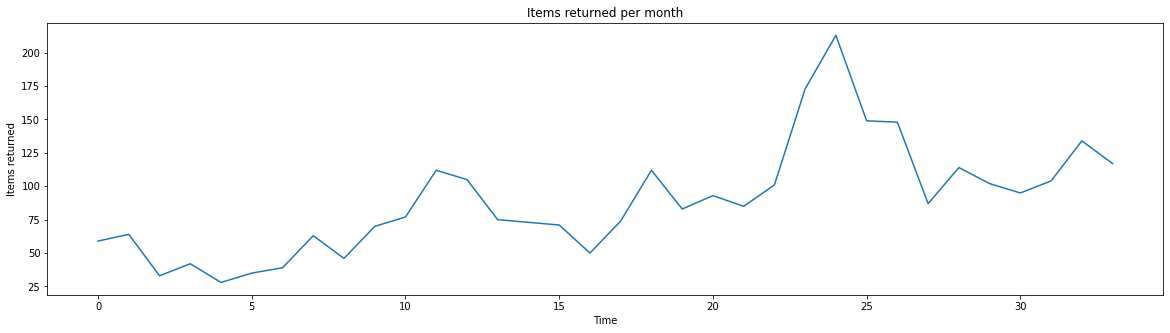

In [18]:
## Checking number of returned items
returned_items = sales[sales['item_cnt_day'] < 0]
month_wise_items_returned = returned_items.groupby('date_block_num').agg({'item_cnt_day' : sum})
month_wise_items_returned['item_cnt_day'] = month_wise_items_returned['item_cnt_day'].abs()
plt.figure(figsize=(20,5))
plt.title('Items returned per month')
plt.xlabel('Time')
plt.ylabel('Items returned')
plt.plot(month_wise_items_returned);

### The maximum number of items were returned to the company in 24th month of the data provided i.e. December 2014

# Exploring Time Series

In [19]:
timeseries = month_wise_items_sold 

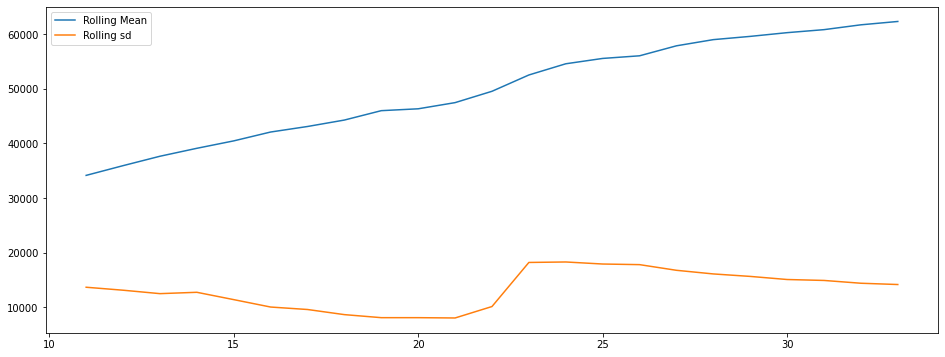

In [20]:
plt.figure(figsize=(16,6))
plt.plot(timeseries.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(timeseries.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

As we can see in the above graph, there is an obvious "seasonality" (Eg: peak sales around a time of year) and a increasing "Trend".

Let's check that with decomposition into Trend, seasonality and residuals.

multiplicative model
Additive model


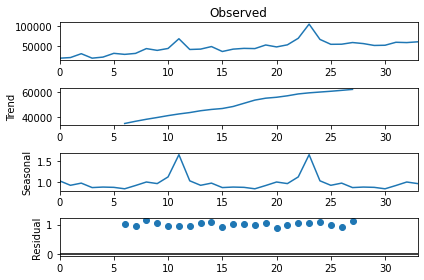

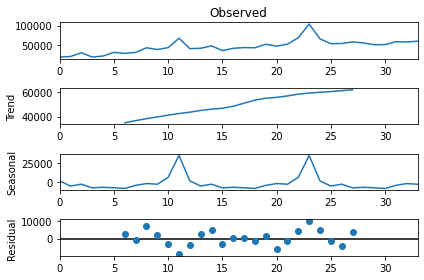

In [21]:
import statsmodels.api as sm

print('multiplicative model')
# multiplicative
mul_model = sm.tsa.seasonal_decompose(timeseries.values,freq=12,model="multiplicative")

fig = mul_model.plot()

# ------------------------------------------------------------------------------------
print('Additive model') 
# Additive
add_model = sm.tsa.seasonal_decompose(timeseries.values,freq=12,model="additive")

fig = add_model.plot()


## As we can see there is still some patterns left in the residual of additive model, we would assume the timeseries to be multiplicative that can be shown as yt=St x Tt x Et

In [22]:
# Stationarity tests
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(timeseries)

Dickey-Fuller Test:
Test Statistic                 -2.554729
p-value                         0.102719
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


As p value > 0.05 we take the series as seosanal time series

## Decomposing time series data

In [23]:
# To remove trend
from pandas import Series as Series

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

In [24]:
timeseries.columns

Index(['item_cnt_day'], dtype='object')

[]

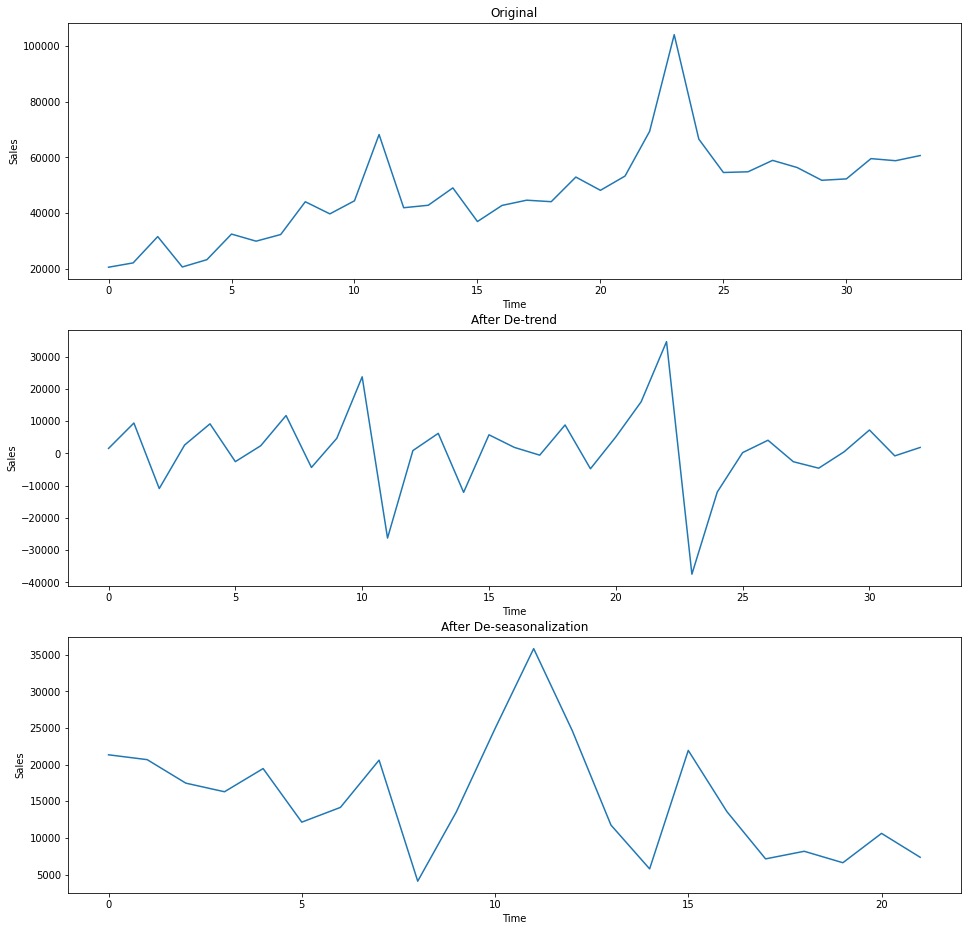

In [25]:
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))

plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)

plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [26]:
# now testing the stationarity again after de-seasonality
test_stationarity(new_ts)

Dickey-Fuller Test:
Test Statistic                 -2.910085
p-value                         0.044188
#Lags Used                      1.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


As p value is now less than 0.05, we can consider that the data is stationary

# Time Series Forecasting
### We  will apply prophet model for baseline

In [27]:
# adding the dates to the Time-series as index
ts=sales.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts.head()

,index,item_cnt_day
0,2013-01-01,20612.0
1,2013-02-01,22163.0
2,2013-03-01,31599.0
3,2013-04-01,20704.0
4,2013-05-01,23322.0


In [28]:
from fbprophet import Prophet

ts.columns=['ds','y']
#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet( yearly_seasonality=True) 
model.fit(ts) #fit the model with your dataframe

In [29]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 5, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,73415.924573,69309.080950,77161.898291
35,2015-12-01,111042.191785,107083.414188,114621.337367
36,2016-01-01,71718.320695,67979.751575,75653.637452
37,2016-02-01,55591.277851,51792.294039,59593.065184
38,2016-03-01,79784.319639,75726.176396,83655.484612


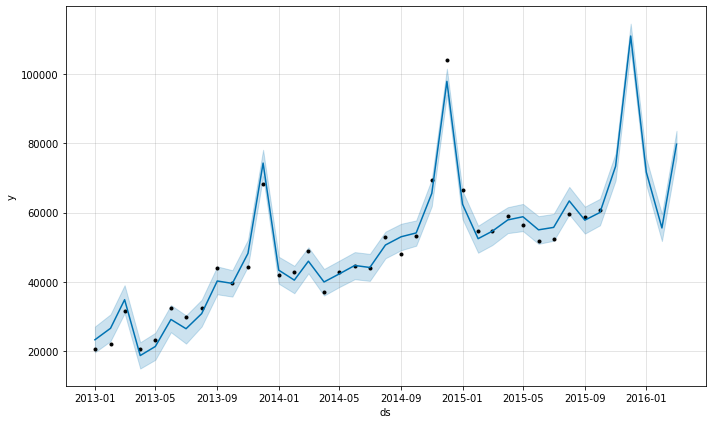

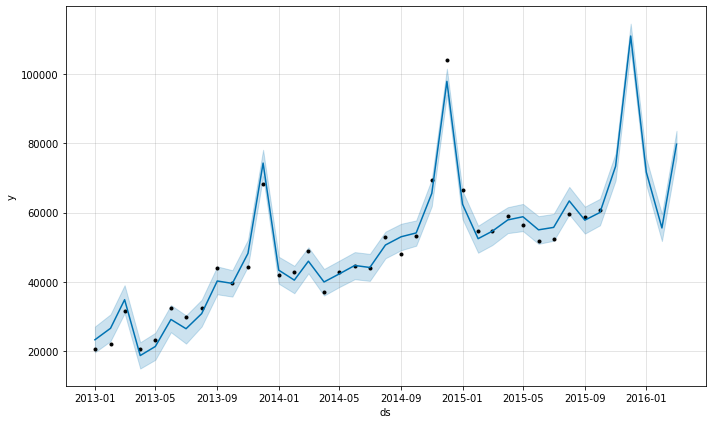

In [30]:
model.plot(forecast)

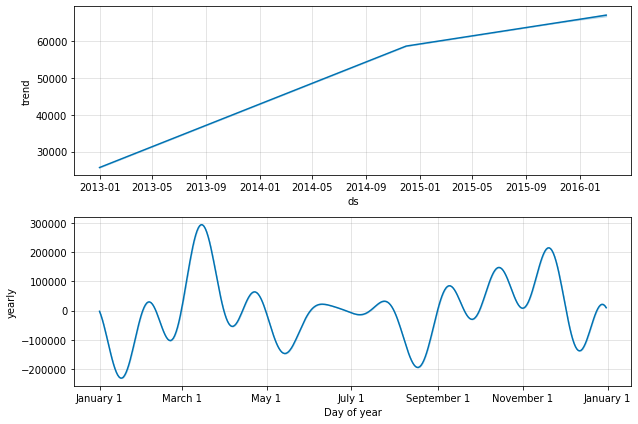

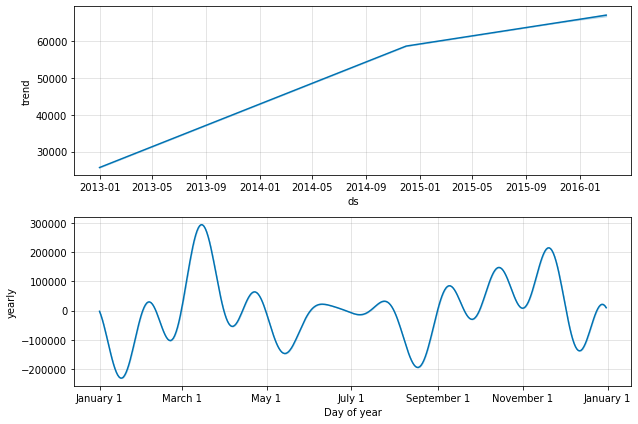

In [31]:
model.plot_components(forecast)